## ECEN 689: HW 5

### Submission by: Flavia Ratto (130004853)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

###### Q1) Polynomial Regression

In [7]:
def best_fit_polyreg(m,t,n):
    #m --> Number of training samples
    #t --> Numbver of testing samples
    #n --> Max Degree of polynomial
    
    np.random.seed(100)
    sd = math.sqrt(0.01)
    
    #Training Data
    x_tr = np.random.uniform(0,1,size=(m,1)) #Generate Xi Train
    w_tr = np.random.normal(0,sd,size=(m,1))  #Generate noise Train
    y_tr = []   #Calculate Yi Train

    for i,j in zip(x_tr,w_tr):
        hTrue_x = math.cos(2*np.pi*i)
        y_tr.append(hTrue_x + j)
    y1 = np.array(y_tr)    
   
    x_train = np.zeros((m,n+1))
    #x_train[:,0] = 1
    for i in range(n+1):
        x_train[:,i] = np.power(x_tr,i).reshape((m,))
    x_train_t = x_train.transpose()

    #Generate Testing data
    x_tes = np.random.uniform(0,1,size=(t,1)) #Generate Xi Test
    w_tes = np.random.normal(0,sd,size=(t,1))  #Generate noise Test
    y_tes = []   #Calculate Yi Test
    
    for i,j in zip(x_tes,w_tes):
        hTrue_x = math.cos(2*(np.pi)*i)
        y_tes.append(hTrue_x + j)    
    y2 = np.array(y_tes)    
     
    x_test = np.zeros((t,n+1))
    #x_test[:,0] = 1
    for i in range(n+1):
        x_test[:,i] = np.power(x_tes,i).reshape((t,))
    x_test_t = x_test.transpose()
    
    min_error_tr=[]
    min_error_tes = []
        
    for i in range(n+1):    
        train_x = x_train[:,:i+1]
        train_x_t = train_x.transpose()
        test_x = x_test[:,:i+1]
        test_x_t = test_x.transpose()
        
        A = np.matmul(train_x_t, train_x)
        inv_A = np.linalg.inv(A)
        B = np.matmul(train_x_t,y1)
        w = np.matmul(inv_A,B)
        
        y_tr_pred = np.matmul(train_x,w)
        y_pred = np.matmul(test_x,w)
        
        #Calculating minimum Training error and Testing error
        f = np.sum(np.square(y1 - y_tr_pred))/m
        min_error_tr.append(f)
              
        k = np.sum(np.square(y2 - y_pred))/t
        min_error_tes.append(k)    
        
    #print(min_error_tr)
    #print(min_error_tes)
    
    #Plotting
    plt.figure()
    plt.subplot(211)
    plt.plot(range(n+1), min_error_tr, '-o')
    plt.xlabel('Degree of polynomial')
    plt.ylabel('Training Error')
    
    plt.subplot(212)
    plt.plot(range(n+1), min_error_tes, '-o')
    plt.xlabel('Degree of polynomial')
    plt.ylabel('Test Error')
    
    #Finding n that gives minimal test error
    min_err = np.amin(min_error_tes)
    print(min_err)
    minimal_n = np.where(min_error_tes == np.amin(min_error_tes))
    #print(minimal_n)
    print("The value of n that has the minimal Test Error is "+str(minimal_n[0][0]))
    

Part (i), (ii) and (iii)

0.021664105537408974
The value of n that has the minimal Test Error is 4


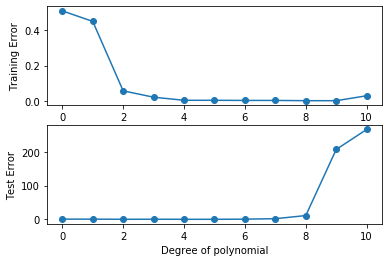

In [4]:
m = 10
t = 100
n = 10
best_fit_polyreg(m,t,n)

Part (iv)

0.011145036426699416
The value of n that has the minimal Test Error is 5


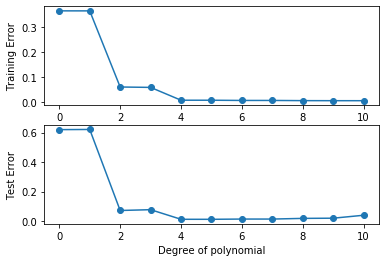

In [6]:
m = 20
t = 100
n = 10
best_fit_polyreg(m,t,n)

###### Q2) L2 Regularization Ridge Regression

In [10]:
def ridge_reg(m,t,n):
    
    #m --> Number of training samples
    #t --> Numbver of testing samples
    #n --> Max Degree of polynomial
    np.random.seed(100)
    sd = math.sqrt(0.01)
    
    #Generate Training Data
    x_tr = np.random.uniform(0,1,size=(m,1)) #Generate Xi Train
    w_tr = np.random.normal(0,sd,size=(m,1))  #Generate noise Train
    y_tr = []   #Calculate Yi Train

    for i,j in zip(x_tr,w_tr):
        hTrue_x = math.cos(2*np.pi*i)
        y_tr.append(hTrue_x + j)
    y1 = np.array(y_tr)    
   
    x_train = np.zeros((m,n+1))
    for i in range(n+1):
        x_train[:,i] = np.power(x_tr,i).reshape((m,))
    x_train_t = x_train.transpose()

    #Generate Testing data
    x_tes = np.random.uniform(0,1,size=(t,1)) #Generate Xi Test
    w_tes = np.random.normal(0,sd,size=(t,1))  #Generate noise Test
    y_tes = []   #Calculate Yi Test
    
    for i,j in zip(x_tes,w_tes):
        hTrue_x = math.cos(2*(np.pi)*i)
        y_tes.append(hTrue_x + j)        
    y2 = np.array(y_tes)    

    x_test = np.zeros((t,n+1)) 
    for i in range(n+1):
        x_test[:,i] = np.power(x_tes,i).reshape((t,))
    x_test_t = x_test.transpose()
    
    
    lambda_r = np.array([0.05,0.1,0.2,0.5, 1,20, 50, 200, 500, 700, 1000])
    
    min_error_tr=[]
    min_error_tes = []
    coeff = []
    
    for i in lambda_r:
        
        A = np.matmul(x_train_t, x_train) + (i*np.eye(n+1))
        inv_A = np.linalg.inv(A)
        B = np.matmul(x_train_t,y1)
        w = np.matmul(inv_A, B)
        coeff.append(w)
        
        w_norm = np.linalg.norm(w,ord = 2)
        T2 = i*np.square(w_norm)
        
        y_tr_pred = np.matmul(x_train,w)
        y_pred = np.matmul(x_test,w)
       
        f = np.sum(np.square(y1 - y_tr_pred))/m
        min_error_tr.append(f)
          
        k = np.sum(np.square(y2 - y_pred))/t
        min_error_tes.append(k)     
        
    #print(min_error_tr)
    #print(min_error_tes)
    
    #Plotting
    plt.figure()
    plt.subplot(211)
    plt.plot(np.log10(lambda_r), min_error_tr, '-o')
    plt.xlabel('log λ')
    plt.ylabel('Training Error')

    plt.subplot(212)
    plt.plot(np.log10(lambda_r), min_error_tes, '-o')
    plt.xlabel('log λ')
    plt.ylabel('Test Error')
    
    #Finding λ that has minimal test error and the corresponding polynomial
    min_err = np.amin(min_error_tes)
    print(min_err)
    minimal_n = np.where(min_error_tes == np.amin(min_error_tes))
    lam = minimal_n[0][0]
    #print(minimal_n)
    print("The value of λ that has the minimal Test Error is "+str(lambda_r[lam]))
    print("The corresponding polynomial coefficients are: ")
    print(coeff[lam])
        
    

Part (i), (ii) and (iii)

0.25086757170424645
The value of λ that has the minimal Test Error is 0.5
The corresponding polynomial coefficients are: 
[[ 0.25706671]
 [-0.93537073]
 [-0.22090341]
 [ 0.17561252]
 [ 0.34351516]
 [ 0.39317949]
 [ 0.386632  ]
 [ 0.35550093]
 [ 0.31553936]
 [ 0.27442212]
 [ 0.23570809]]


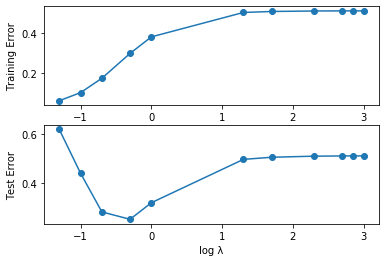

In [11]:
ridge_reg(10,100,10)

Part (iv)

0.09805518860874765
The value of λ that has the minimal Test Error is 0.05
The corresponding polynomial coefficients are: 
[[ 0.89325365]
 [-3.38192337]
 [-0.09689683]
 [ 1.49518822]
 [ 1.79069691]
 [ 1.47487037]
 [ 0.92851232]
 [ 0.33380946]
 [-0.22835403]
 [-0.72622487]
 [-1.15134374]]


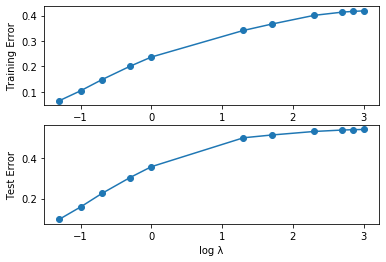

In [12]:
ridge_reg(20,100,10)